#### CONVOLUTION NEURAL NETWORKS

#### Assignment 1:
MNIST: This is one of the important databases for deep learning. Microsoft and Google lab researchers have reportedly contributed to this dataset of handwritten digits. It is basically constructed from NIST that contains binary images of handwritten digits.


In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Dataset Info: 
The dataset contains 60,000 examples of the training set and 10,000 examples of the test set. There are four files in this dataset

Download dataset from: http://yann.lecun.com/exdb/mnist/


In [7]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

#### Task: Build an image classifier using the MNIST dataset. 

In [10]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       
    layers.Dense(128, activation='relu'),       
    layers.Dense(64, activation='relu'),         
    layers.Dense(10, activation='softmax')    
])

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9285 - loss: 0.2440 - val_accuracy: 0.9492 - val_loss: 0.1639
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9689 - loss: 0.1016 - val_accuracy: 0.9723 - val_loss: 0.0881
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9783 - loss: 0.0704 - val_accuracy: 0.9743 - val_loss: 0.0829
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0531 - val_accuracy: 0.9751 - val_loss: 0.0824
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0427 - val_accuracy: 0.9756 - val_loss: 0.0804


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9756 - loss: 0.0804

Test Accuracy: 0.975600004196167


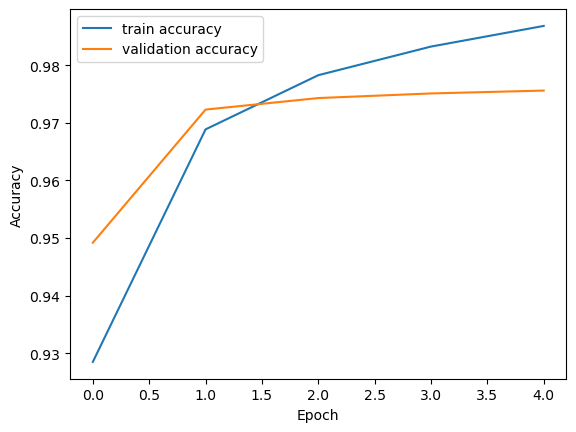

In [14]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
print("\nWeights and Biases:")
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        print(f"\nLayer: {layer.name}")
        print(f"Weights shape: {weights.shape}")
        print(f"Biases shape: {biases.shape}")


Weights and Biases:

Layer: dense_3
Weights shape: (784, 128)
Biases shape: (128,)

Layer: dense_4
Weights shape: (128, 64)
Biases shape: (64,)

Layer: dense_5
Weights shape: (64, 10)
Biases shape: (10,)


In [16]:
import numpy as np

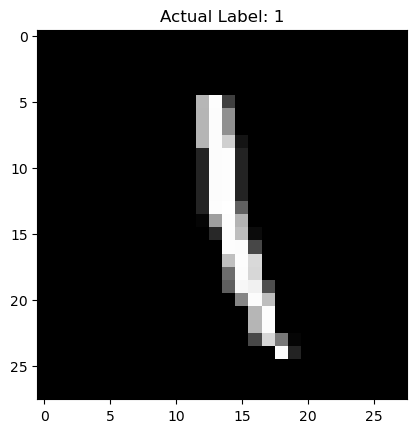

In [17]:
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Actual Label: {y_test[index]}")
plt.show()

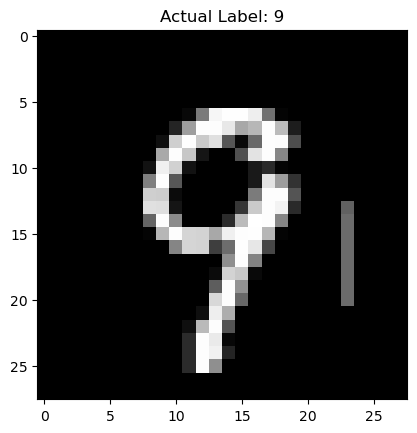

In [18]:
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Actual Label: {y_test[index]}")
plt.show()

In [19]:
pred = model.predict(x_test[index].reshape(1, 28, 28))
print("Predicted Label:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Label: 9
